# Building A Handwritten Digits Classifier

## Introduction

In this project, we'll:

- explore why image classification is a hard task
- observe the limitations of traditional machine learning models for image classification
- train, test, and improve a few different deep neural networks for image classification

Deep neural networks have been used to reach state-of-the-art performance on image classification tasks in the last decade. For some image classification tasks, deep neural networks actually perform as well as or slightly better than the human benchmark.

**Why is image classification a hard task?**

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256.

Here's an example of how an image is represented across the different abstractions we care about:

![image](data/image.svg)

**Why is deep learning effective in image classification?**

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process. Here's a diagram that visualizes what the weights represent at each layer of a convolutional neural network, a type of network that's often used in image classification, which was trained to identify faces.

![faces](data/faces.png)

You'll notice in the first hidden layer the network learned to represent edges and specific features of faces. In the second hidden layer, the weights seemed to represent higher level facial features like eyes and noses. Finally, the weights in the last hidden layer resemble faces that could be matched against. Each successive layer uses weights from previous layers to try to learn more complex representations.

In this project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images and build models that can classify handwritten digits.

## Working With Image Data

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of `sklearn.datasets`. The `load_digits()` function returns a copy of the [hand-written digits dataset from UCI](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

In [3]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
digits_data = load_digits()
digits_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [14]:
labels = pd.Series(digits_data['target'])
data = pd.DataFrame(digits_data['data'])
print(data.shape)
data.head(1)

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


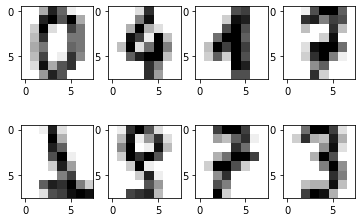

In [9]:
### Displaying images using pyplot.imshow and reshaped data row
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[100].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[200].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[300].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[1000].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1100].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1200].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1300].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors Model

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm makes no such assumption. This allows it to capture nonlinearity in the data.

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [31]:
model = KNeighborsClassifier(n_neighbors=2)
scores = cross_val_score(model, data, labels, cv=5)
"Accuracy: {:.2%}".format(np.mean(scores))

'Accuracy: 96.72%'

In [ ]:
### Plot different k-values and accuracy
k_values = list(range(1, 100))
k_overall_accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, data, labels, cv=5)
    k_overall_accuracies.append(np.mean(scores))

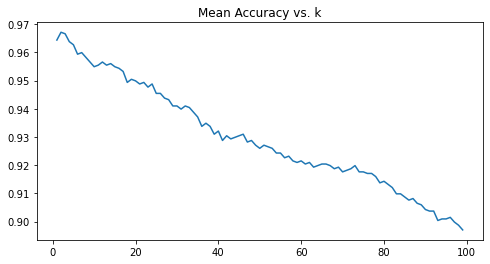

In [33]:
plt.figure(figsize=(8, 4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

## Neural Network With One Hidden Layer

There are a few downsides to using k-nearest neighbors:

- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore

Let's now try a neural network with a single hidden layer using the `MLPClassifier` package from scikit-learn.

In [53]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(1280), max_iter=1000)
scores = cross_val_score(model, data, labels, cv=5)
"Accuracy: {:.2%}".format(np.mean(scores))

'Accuracy: 94.83%'

In [47]:
### Plot different neurons amount and accuracy
nn_one_neurons = [
    (8),
    (16),
    (32),
    (64),
    (128),
    (256),
    (512),
    (1024),
    (2048)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    model = MLPClassifier(hidden_layer_sizes=n, max_iter=2000)
    scores = cross_val_score(model, data, labels, cv=5)
    nn_one_accuracies.append(np.mean(scores))

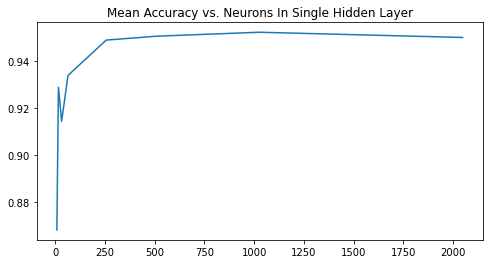

In [48]:
plt.figure(figsize=(8, 4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

It looks like adding more neurons to the single hidden layer improved simple accuracy to approximately `95%`. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately `97%` accuracy, using a single hidden layer neural network for this problem is worse in accuracy.

## Neural Network With Two Hidden Layers

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

In [55]:
nn_two_neurons = [
    (8, 8),
    (16, 16),
    (32, 32),
    (64, 64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    model = MLPClassifier(hidden_layer_sizes=n, max_iter=2000)
    scores = cross_val_score(model, data, labels, cv=5)
    nn_two_accuracies.append(np.mean(scores))

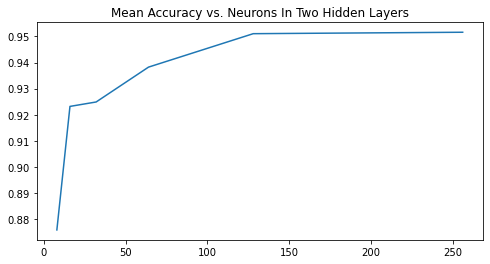

In [56]:
plt.figure(figsize=(8, 4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

In [58]:
model = MLPClassifier(hidden_layer_sizes=(500, 500), max_iter=1000)
scores = cross_val_score(model, data, labels, cv=5)
"Accuracy: {:.2%}".format(np.mean(scores))

'Accuracy: 95.05%'

In [59]:
model = MLPClassifier(hidden_layer_sizes=(1000, 1000), max_iter=1000)
scores = cross_val_score(model, data, labels, cv=5)
"Accuracy: {:.2%}".format(np.mean(scores))

'Accuracy: 95.33%'

Using 2 hidden layers didn't specially improve our simple accuracy.

## Neural Network With Three Hidden Layers

In [63]:
nn_three_neurons = [
    (4, 4, 4),
    (8, 8, 8),
    (16, 16, 16),
    (32, 32, 32),
    (64, 64, 64),
    (128, 128, 128)
]
nn_three_accuracies = []

for n in nn_three_neurons:
    model = MLPClassifier(hidden_layer_sizes=n, max_iter=2000)
    scores = cross_val_score(model, data, labels, cv=5)
    nn_three_accuracies.append(np.mean(scores))

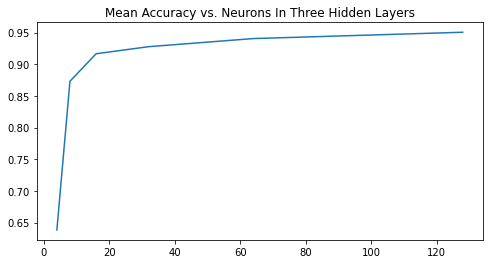

In [64]:
plt.figure(figsize=(8, 4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

In [66]:
model = MLPClassifier(hidden_layer_sizes=(300, 300, 300), max_iter=1000)
scores = cross_val_score(model, data, labels, cv=5)
"Accuracy: {:.2%}".format(np.mean(scores))

'Accuracy: 95.38%'

Using 3 hidden layers didn't specially improve our simple accuracy.

## Decision Tree and Random Forest Models

In [106]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1, min_samples_split=3, max_depth=13)
scores = cross_val_score(model, data, labels, cv=5)
"Accuracy: {:.2%}".format(np.mean(scores))

'Accuracy: 79.58%'

In [127]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1, min_samples_split=4)
scores = cross_val_score(model, data, labels, cv=5)
"Accuracy: {:.2%}".format(np.mean(scores))

'Accuracy: 93.88%'

## Conclusions

We've explored some ML algorithms in hand-written numbers recognition and found out that:

- K-Nearest Neighbors gives 97% accuracy


- Neural Network with 1 hidden layer - 95%


- Neural Network with 2 hidden layers - 95%


- Neural Network with 3 hidden layers - 95%


- Decision Tree - 80%


- Random Forest - 94%